# K Means Clustering Algorithms Implementation

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [3]:
X.shape

(1000, 2)

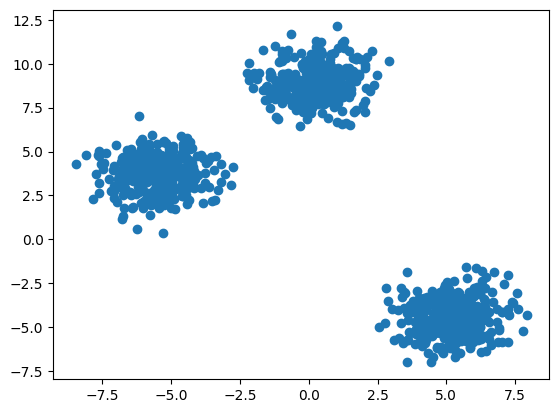

In [4]:
plt.scatter(X[:,0],X[:,1])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.cluster import KMeans

In [7]:
# Manual Method(Elbow Method to find K value)

wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)


In [8]:
wcss

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1201.6471739523965,
 992.0708509383511,
 857.7584332406449,
 754.3818382775474,
 678.2560956988141,
 592.149899726398,
 550.9333993760965]

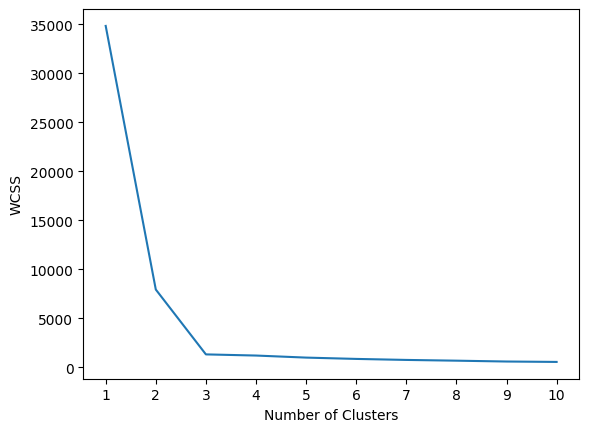

In [9]:
# plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [10]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [11]:
y_labels=kmeans.fit_predict(X_train)

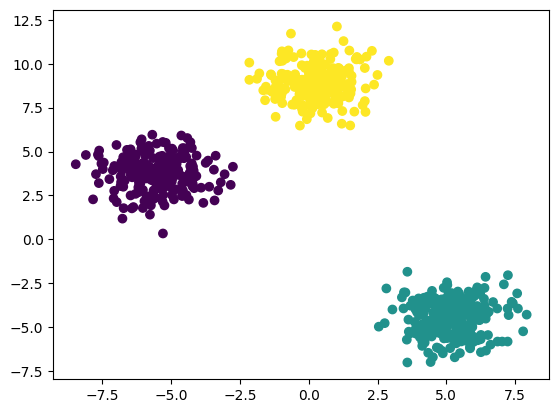

In [12]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [13]:
# knee locator
!pip install kneed

In [14]:
from kneed import KneeLocator

In [15]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [16]:
## Performance Matrix
## Silhoutte score
from sklearn.metrics import silhouette_score

In [17]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [18]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6342048026735033,
 0.48239020886895395,
 0.3359252362477403,
 0.3339224996226771,
 0.33947567818079305,
 0.33913518244258906,
 0.3357724206926997]

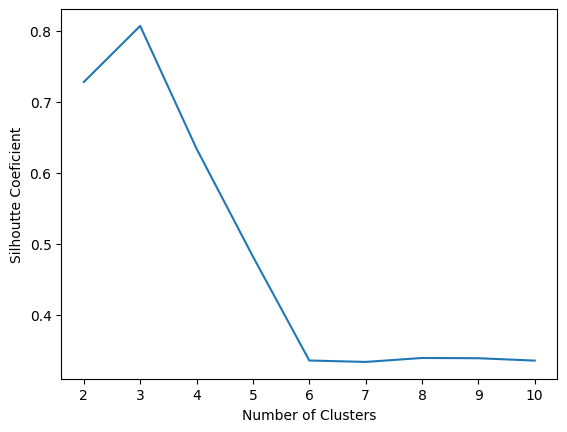

In [19]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coeficient")
plt.show()

## Hierarichal Clustering Implementation

In [22]:
from sklearn import datasets

In [23]:
# Import IRIS dataset
iris=datasets.load_iris()

In [24]:
iris_data=pd.DataFrame(iris.data)

In [25]:
iris_data.columns=iris.feature_names

In [26]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
X_scaled=scaler.fit_transform(iris_data)

In [41]:
X_scaled.shape

(150, 4)

In [33]:
X_scaled.shape

(150, 4)

In [34]:
## Apply the PCA
from sklearn.decomposition import PCA

In [35]:
pca=PCA(n_components=2)

In [36]:
pca

PCA(n_components=2)

In [37]:
pca_scaled=pca.fit_transform(X_scaled)

In [40]:
pca_scaled.shape

(150, 2)

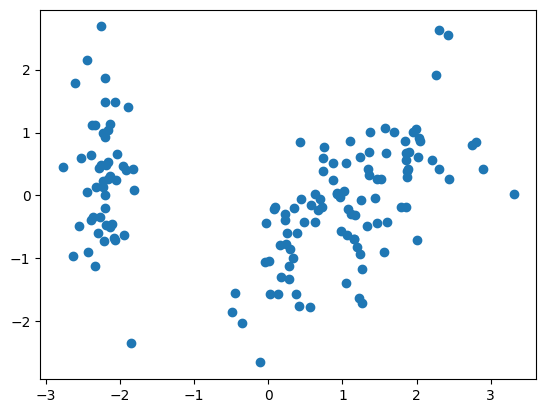

In [38]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Eucledian Distance')

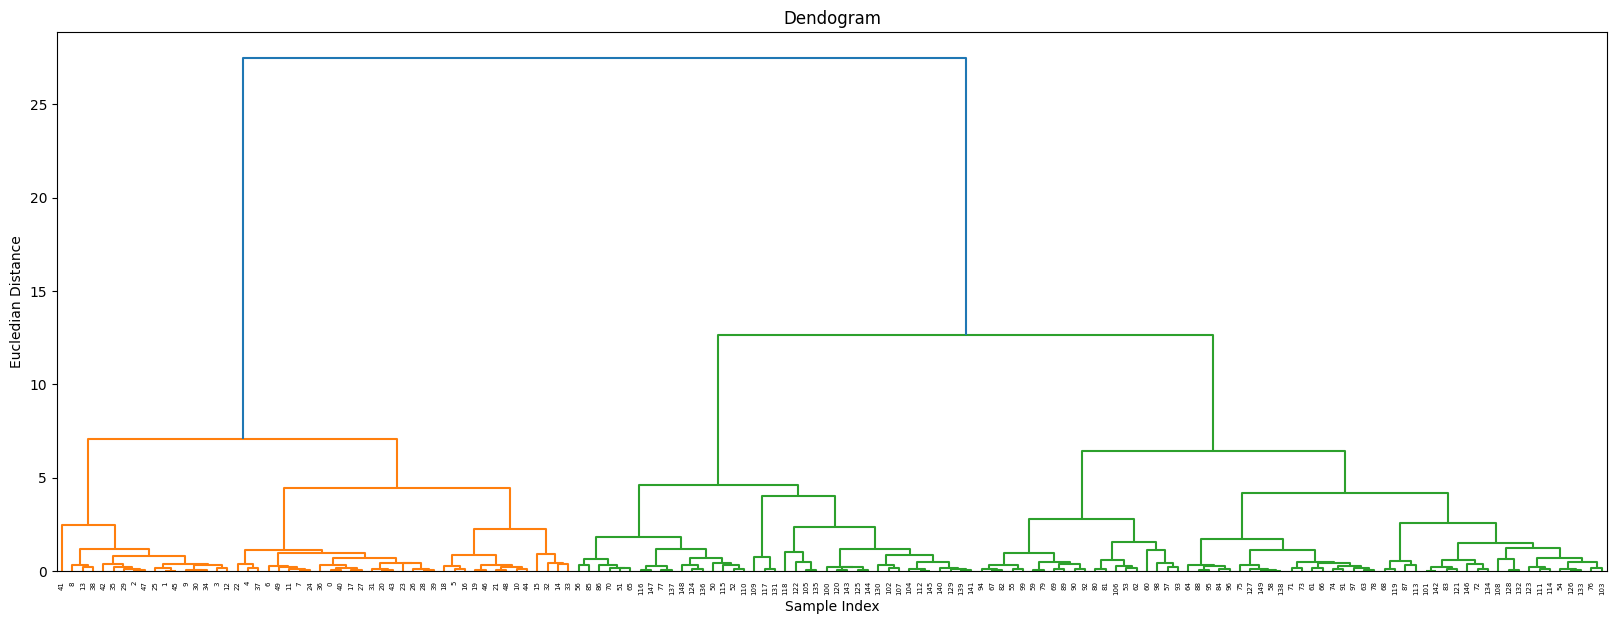

In [42]:
#Agglomerative Clustering
#To construct a dendogram
import scipy.cluster.hierarchy as sc
##plot the dendogram
plt.figure(figsize=(20,7))
plt.title("Dendograms")

## create dendogram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

In [44]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [45]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

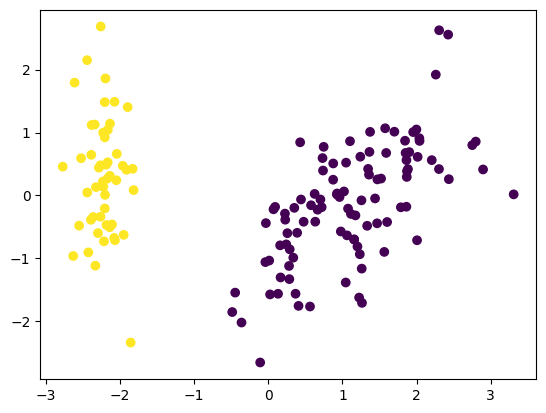

In [46]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [55]:
silhouette_coefficients=[]
for k in range(2,11):
    agglo = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
    agglo.fit(X_scaled)
    score=silhouette_score(X_scaled,agglo.labels_)
    silhouette_coefficients.append(score)

In [56]:
silhouette_coefficients

[0.5770346019475989,
 0.5770346019475989,
 0.5770346019475989,
 0.5770346019475989,
 0.5770346019475989,
 0.5770346019475989,
 0.5770346019475989,
 0.5770346019475989,
 0.5770346019475989]

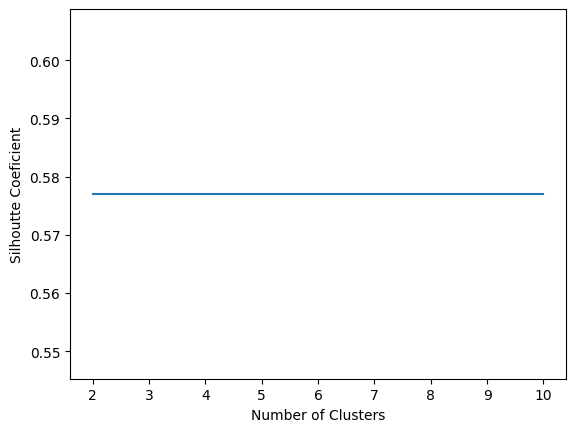

In [58]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coeficient")
plt.show()

## DBSCAN

In [59]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
X,y=make_moons(n_samples=250,noise=0.05)

In [61]:
X

array([[ 0.04296799,  1.06326828],
       [ 1.44687744, -0.3781735 ],
       [ 2.03310374,  0.23176834],
       [ 1.18241725, -0.46355024],
       [ 0.22956249, -0.13526631],
       [ 1.87650964,  0.19331357],
       [-0.65939315,  0.80422129],
       [-0.84371246,  0.40682209],
       [ 0.69840077, -0.42836009],
       [-0.85832394,  0.67154548],
       [ 0.03387795,  0.95830156],
       [-0.35440589,  0.99779158],
       [ 0.66664315, -0.40984945],
       [ 0.20216938, -0.19883889],
       [ 1.72978364, -0.09817164],
       [-0.40623528,  0.90998774],
       [ 1.04659437,  0.01881382],
       [-1.01103153,  0.08654068],
       [-0.23230518,  0.96949147],
       [-0.47864556,  0.97646998],
       [ 0.7995584 ,  0.53299407],
       [-0.62405959,  0.83570626],
       [ 0.77561937,  0.47051285],
       [ 0.76569404,  0.56559956],
       [ 0.30663518, -0.23260619],
       [-0.62868965,  0.89141615],
       [ 0.41303086, -0.34302115],
       [ 0.21721082,  0.96395741],
       [-1.00421651,

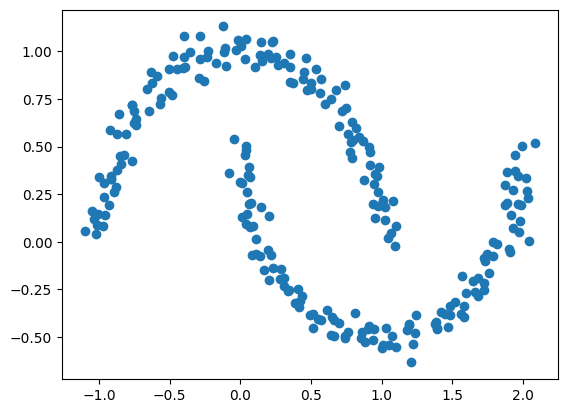

In [62]:
plt.scatter(X[:,0],X[:,1])

In [64]:
## feature scaling(Standard scaling)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [67]:
X_scaled=scaler.fit_transform(X)

In [76]:
### DBSCAN Algorithm
from sklearn.cluster import DBSCAN

In [77]:
dbcan=DBSCAN(eps=0.5)

In [78]:
dbcan.fit(X_scaled)

DBSCAN()

In [79]:
dbcan.labels_

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

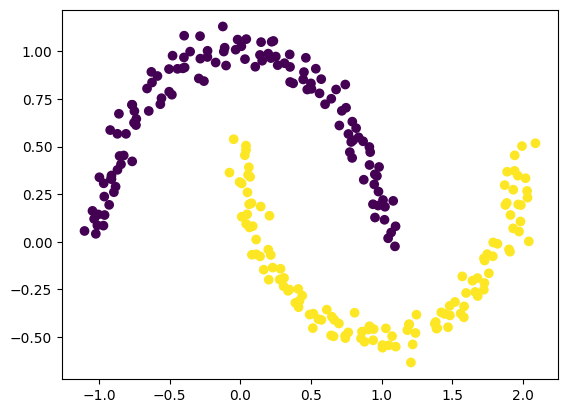

In [80]:
plt.scatter(X[:,0],X[:,1],c=dbcan.labels_)

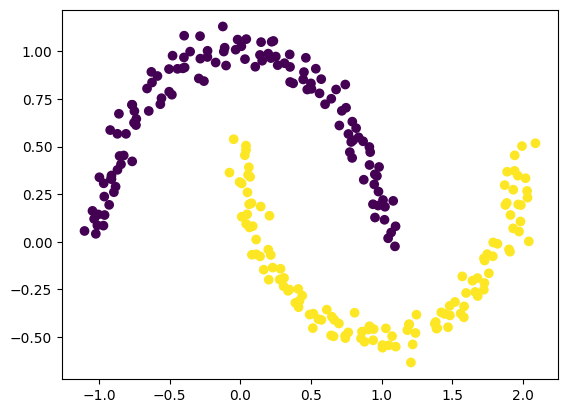

In [81]:
plt.scatter(X[:,0],X[:,1],c=y)